# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Reading Dataset

In [2]:
data = pd.read_csv("lr_data.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Checking and removing any NULL value if present

In [3]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
data = data.dropna()

## Splitting data in test and training types 

In [5]:
train_input = np.array(data.x[0:400]).reshape(400,1)
train_output = np.array(data.y[0:400]).reshape(400,1)
test_input = np.array(data.x[400:700]).reshape(299,1)
test_output = np.array(data.y[400:700]).reshape(299,1)

# <font color="red" size=15px >Linear Regression </font>

## Forward Propogation

y = mx +c    ; where m and c are parameters

In [6]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost Function

<b>Mean squared Error calculations</b><br>
sum(1/2n * ( y - f(x))^2))   

In [7]:
def cost_function (predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    return cost

## Gradiant Descent (Backward Propogation)

df = sum(f(x) - y)/n <br>
dm = df*x <br>
dc = df*1

In [8]:
def backward_propogation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output-predictions ) * -1
    dm = np.mean(np.multiply(df, train_input))
    dc= np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives
    

## Update Parameters

m = m - (learning_rate * dm)<br>
c = c - (learning_rate * dc)

In [9]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - (learning_rate*derivatives["dm"])
    parameters["c"] = parameters["c"] - (learning_rate*derivatives["dc"])
    return parameters

# Model Training Function


In [15]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    for i in range(iters):
        
        predictions = forward_propogation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        legend = ax.legend()
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')                
        plt.show()
        derivatives = backward_propogation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters

# Training

Iteration = 1, Loss = 6119.035271619009


<Figure size 640x480 with 0 Axes>

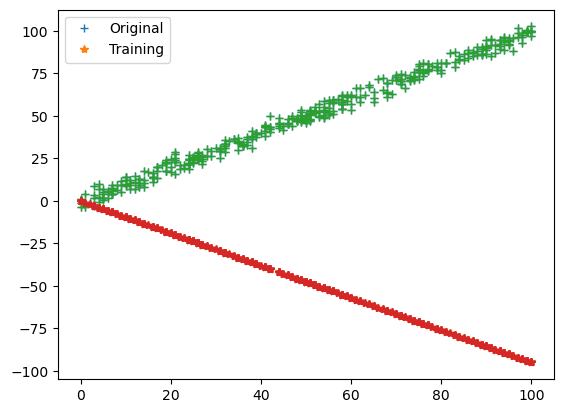

Iteration = 2, Loss = 3369.625212765101


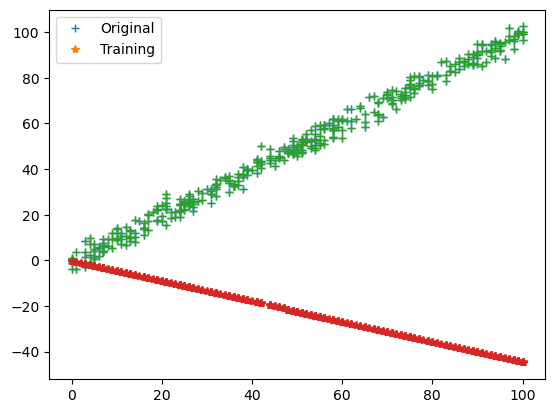

Iteration = 3, Loss = 1856.3706388365422


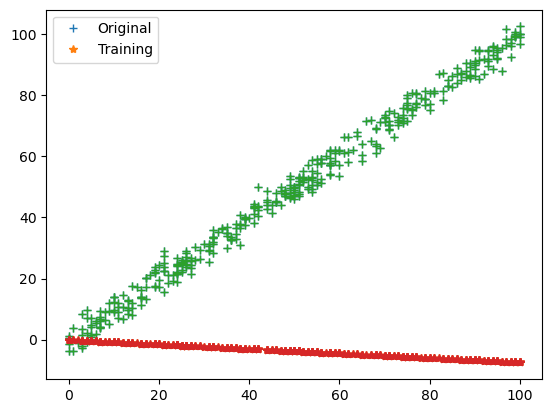

Iteration = 4, Loss = 1023.486726685484


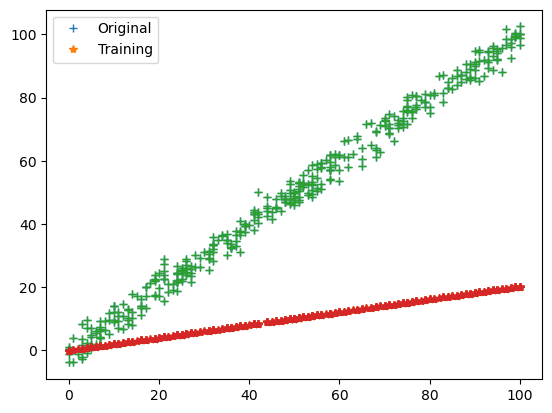

Iteration = 5, Loss = 565.0736987011661


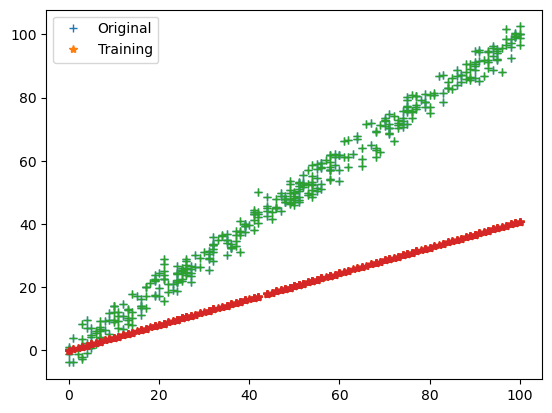

Iteration = 6, Loss = 312.7666229080714


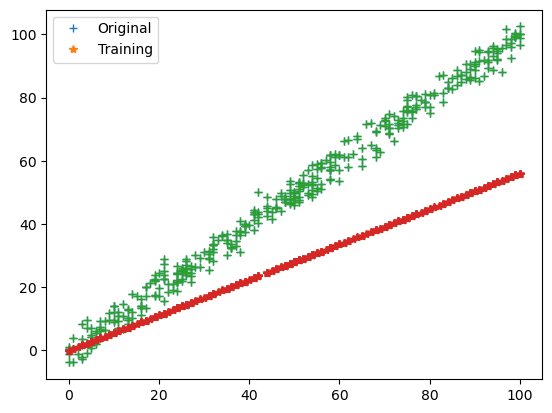

Iteration = 7, Loss = 173.89870974354116


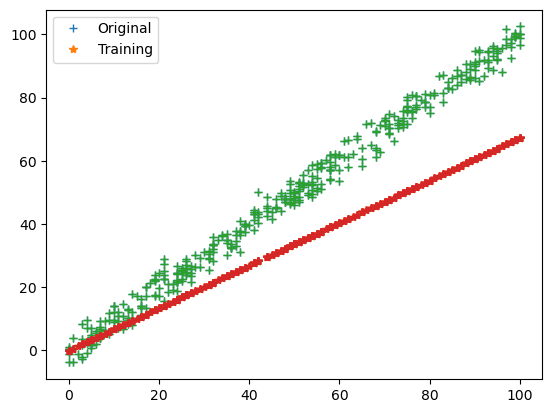

Iteration = 8, Loss = 97.46685667848752


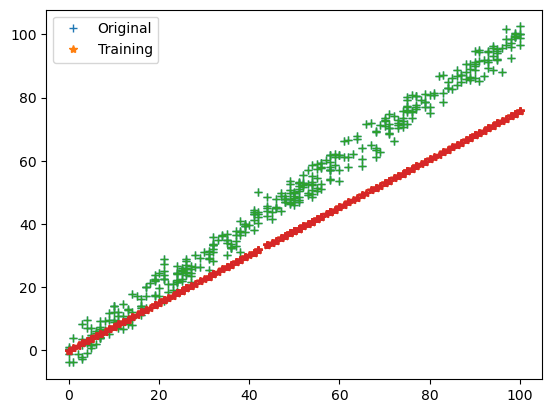

Iteration = 9, Loss = 55.39934050042513


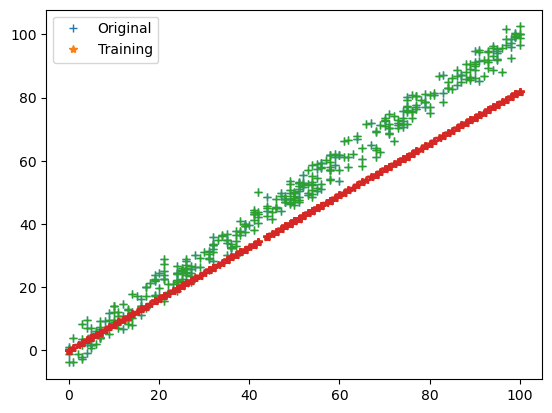

Iteration = 10, Loss = 32.245696334810624


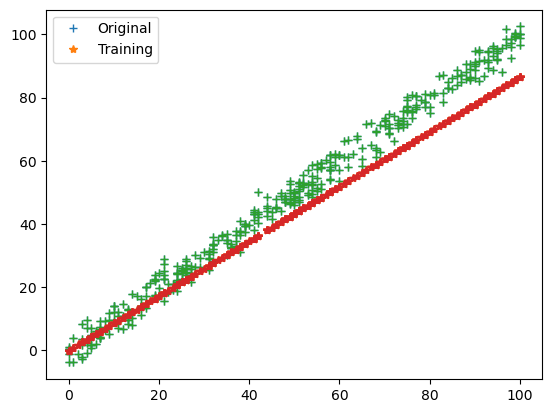

Iteration = 11, Loss = 19.502104767617926


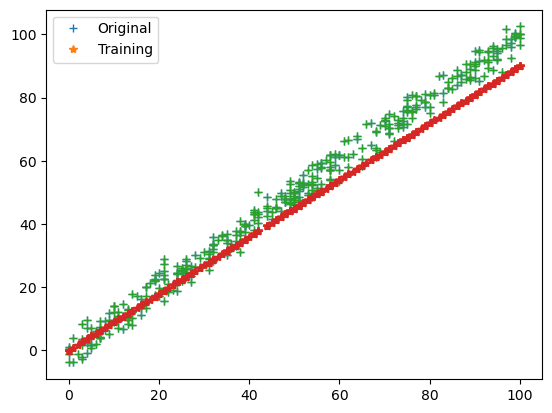

Iteration = 12, Loss = 12.48812768817812


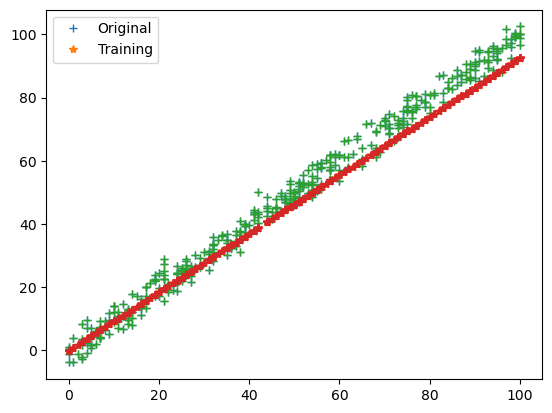

Iteration = 13, Loss = 8.627687237679755


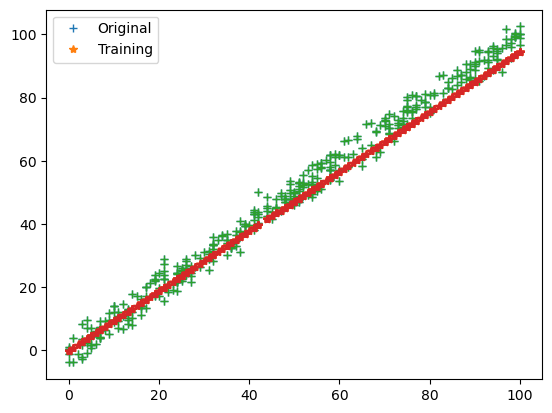

Iteration = 14, Loss = 6.502929578993603


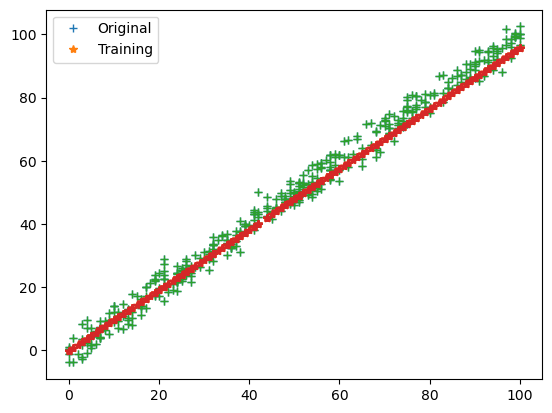

Iteration = 15, Loss = 5.333478646782156


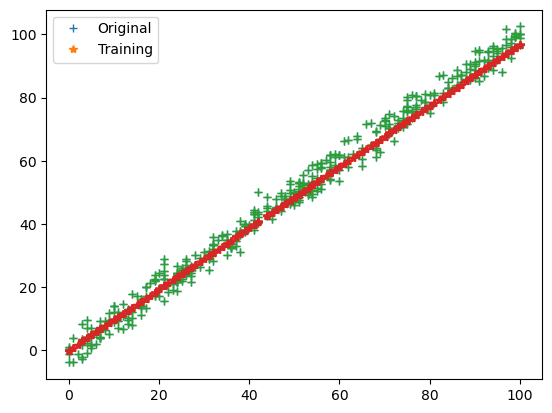

Iteration = 16, Loss = 4.689821336517898


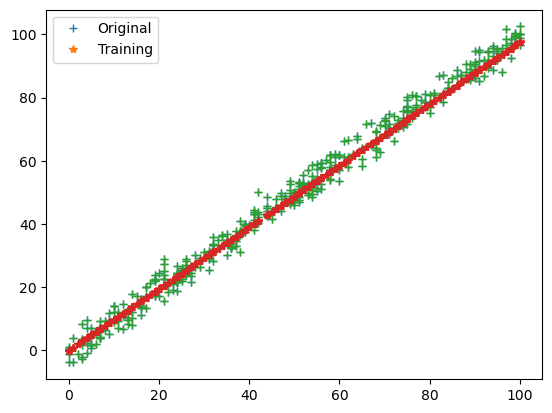

Iteration = 17, Loss = 4.335556872786154


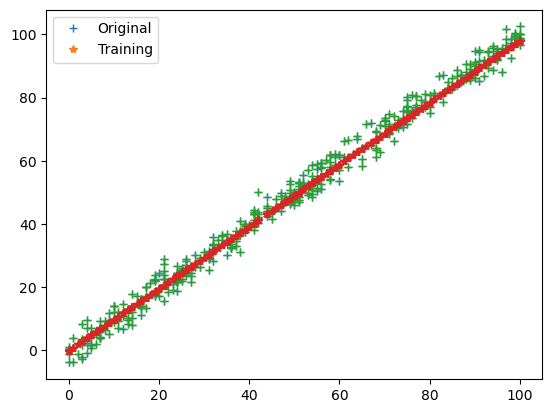

Iteration = 18, Loss = 4.140572050593677


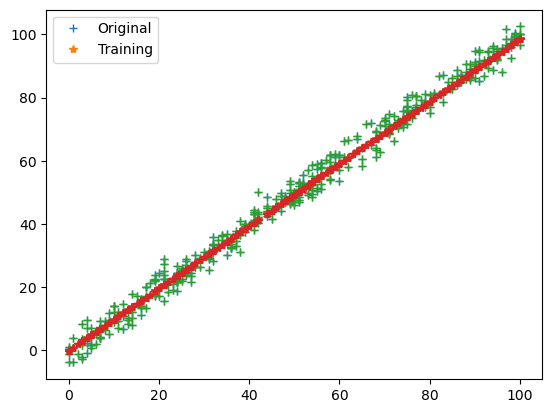

Iteration = 19, Loss = 4.033253542598743


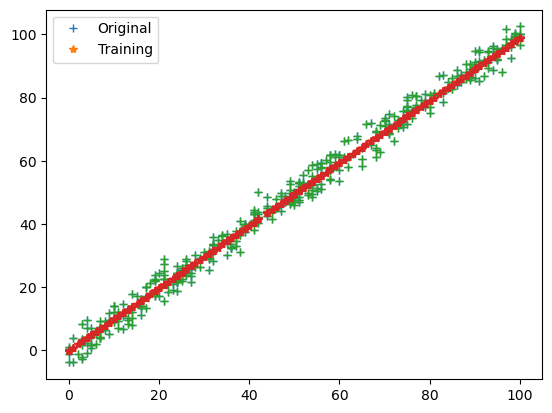

Iteration = 20, Loss = 3.974185913194935


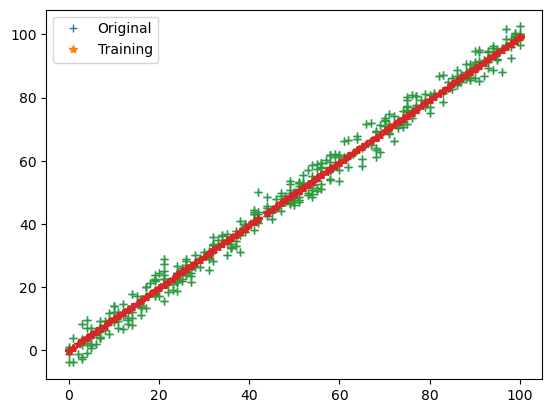

In [16]:
parameters = train(train_input, train_output, 0.00008, 20)

# TESTING THE MODEL

In [17]:
test_predictions = test_input * parameters["m"] + parameters["c"]

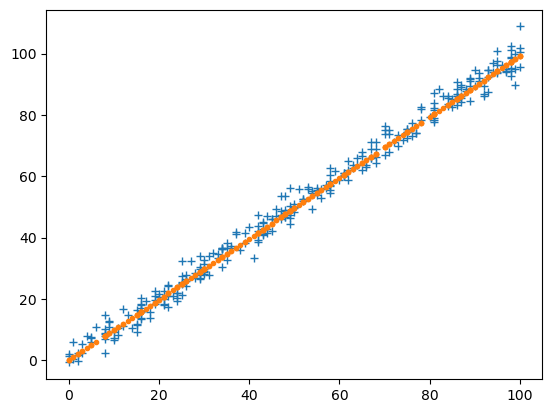

In [18]:
plt.plot(test_input, test_output,"+")
plt.plot(test_input, test_predictions,".")


plt.show()

## Cost for test data


In [19]:
cost_function(test_predictions, test_output)

4.156137457740897

# Predicted Parameters

In [20]:
parameters

{'m': 0.9928098053114419, 'c': -0.09891873546712933}